# Neural Artisan: MINIST Digit Recognition with Deep Learning Precision

### Importing nessesary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers,layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.activations import softmax

C:\Users\user\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
X_test = test
y_train = train['label']
train=train.drop('label',axis=1)



## Performing basic EDA (Explorative Data Analysis)

In [3]:
print('X_train shape',train.shape)
print('y_train shape',y_train.shape)

print(f'X_train (min,max): ({train.iloc[2].min()},{train.iloc[2].max()})')


X_train shape (42000, 784)
y_train shape (42000,)
X_train (min,max): (0,255)


#### Let's plot 2 

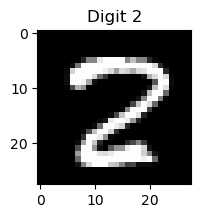

In [4]:
train_2=  train.loc[train[y_train==2].index.tolist()[70]]
plt.figure(figsize=(2,2))
plt.imshow(np.array(train_2).reshape(28,28),cmap='gray')
plt.title('Digit 2')
plt.show()

In [5]:
# normalising the data-set and spiting

train_norm = train / 255.0
X_test = X_test / 255.0
train_norm=train_norm.values.reshape(-1,28,28,1)
X_test=X_test.values.reshape(-1,28,28,1)


In [6]:
X_train,X_val,y_train,y_val = train_test_split(train_norm,y_train , test_size=0.2,random_state=42)


In [7]:
tf.random.set_seed(1234) # for consistent results


model = Sequential([])

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10))



model.compile(optimizer = Adam(0.001),
              loss = SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'] )

hist = model.fit(X_train,y_train,validation_data=(X_val,y_val), epochs = 40,verbose=1)





Epoch 1/40


1050/1050 [==============================] - 23s 16ms/step - loss: 0.1568 - accuracy: 0.9513 - val_loss: 0.0909 - val_accuracy: 0.9715
Epoch 2/40
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0500 - accuracy: 0.9843 - val_loss: 0.0641 - val_accuracy: 0.9808
Epoch 3/40
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0334 - accuracy: 0.9891 - val_loss: 0.0441 - val_accuracy: 0.9869
Epoch 4/40
1050/1050 [==============================] - 25s 24ms/step - loss: 0.0245 - accuracy: 0.9920 - val_loss: 0.0370 - val_accuracy: 0.9879
Epoch 5/40
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0645 - val_accuracy: 0.9824
Epoch 6/40
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0146 - accuracy: 0.9950 - val_loss: 0.0342 - val_accuracy: 0.9893
Epoch 7/40
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0105 - accuracy: 0.9966 - val_loss: 0.03

In [11]:

yhatval = model.predict(X_val)
yhattr = model.predict(X_train)

# applying the softmax activation
yh_val = tf.nn.softmax((yhatval))
yh_train = tf.nn.softmax((yhattr))

prediction = np.argmax(yh_train,axis=1)
predictionval = np.argmax(yh_val,axis=1)

## calculating the error 

error = 0
errorval=0
for i in range(X_train.shape[0]):
    
    if prediction[i] != np.array(y_train)[i]:
        error += 1
        
for j in range(X_val.shape[0]):  
    
    
    if predictionval[j] != np.array(y_val)[j]:
        errorval += 1 
        
print()
print(f'train error: {(X_train.shape[0]-error)/X_train.shape[0]}')
print(f'val error: {(X_val.shape[0]-errorval)/X_val.shape[0]}')

yhat = model.predict(X_test)
x = tf.nn.softmax(yhat)

predictiontst = np.argmax(x,axis=1) 

import csv

with open('submission.csv','w',newline='') as csvfile:
    csvv = csv.writer(csvfile)
    csvv.writerow(['ImageId','Label'])

    for i in range((X_test.shape[0])):
        csvv.writerow([i+1,predictiontst[i]])

1050/1050 [==============================] - 6s 5ms/step

train error: 1.0
val error: 0.9932142857142857
875/875 [==============================] - 10s 12ms/step


## ploting accuracy and results


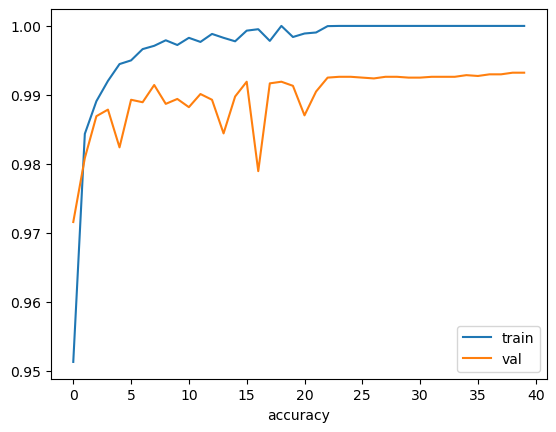

In [12]:
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='val')
plt.xlabel('epochs')
plt.xlabel('accuracy')
plt.legend(loc='lower right')
plt.show()

### Ploting Random Digits from the result

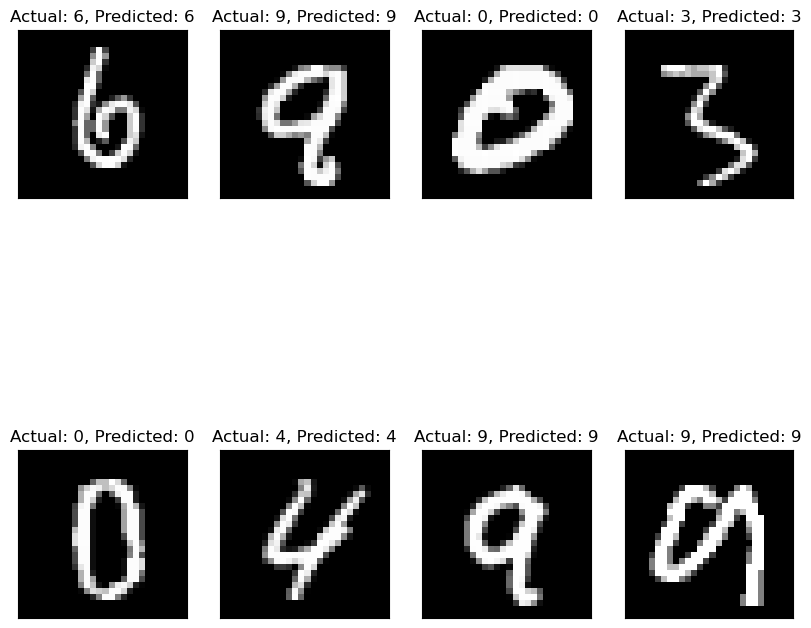

In [13]:
import random
plt.figure(figsize=(10,10))
for i in range(8):
    idx = random.randint(1,len(X_val))
    plt.subplot(2,4,i+1)
    train_ = X_val[idx]
    target = y_val.iloc[idx]
    predicted = predictionval[idx]
    plt.grid(False)
    plt.imshow(train_,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Actual: {target }, Predicted: {predicted}')
plt.show()